# Benchmarking the role of particle statistics in Quantum Reservoir Computing

With this notebook you can reproduce the results about the memory capacity (Figure 3 of this [article]()).

In [ ]:
# Run this cell only in Google Colab
!pip install benchmarking_qrc --quiet

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pathlib

# import code from the repository
import benchmarking_qrc as qrc 
import benchmarking_qrc.run_memory_capacity as qrc_mc

With the following line you can compute the memory capacity of fermions. By changing the set of variables one can fully reproduce Figure 3.

In [2]:
# parameters
n_particles = 4 # number of particles in the reservoir
dimensions = 2 # (boson dim 5 or 6)
operator = "fermion" # fermion, spin or boson
delay = 1
obs_form = "ij" # observables
wash_time = 3000 # 3000 (fermions) 1000 (bosons, spins)
train_time = 1200
test_time = 300
excited_state = 1 # (2 for boson with dim 6)
dt = 10
seed = 1

# Define the Hamiltonian coefficients 
J_ij = qrc.hamiltonian.get_coefficients(n_particles, coef_range=[0, 1], seed=seed)

_, _, train_mc, test_mc = qrc_mc.main(
    n_particles, dimensions, J_ij, operator, delay, obs_form, wash_time, train_time, test_time, excited_state, dt
) 

print(f"The memory capacity (MC) for one realization (seed={seed}) is {np.around(test_mc, 3)}")

The memory capacity (MC) for one realization (seed=1) is 0.808


Figure 3 shows how the memory capacity of fermions decays as the delay (`delay=1`) increases. In addition, to faithfully reproduce the results it will be necessary to run the previous cell with seed values from `seed=1` to `seed=1000`. Since reproducing these results is time consuming let's just use the first 10 seeds.

In [3]:
def memory_capacity_fermions(delay):
    mc_fermions = list()
    
    # Compute MC for seed=1 to seed=10
    for seed in range(1, 11):
        J_ij = qrc.hamiltonian.get_coefficients(n_particles, coef_range=[0, 1], seed=seed)
        _, _, train_mc, test_mc = qrc_mc.main(
            n_particles, dimensions, J_ij, operator, delay, obs_form, wash_time, train_time, test_time, excited_state, dt
        )
        mc_fermions.append(test_mc)
    return np.array(mc_fermions)

In [12]:
mc_delay_1 = memory_capacity_fermions(delay=delay) # delay = 1
print(f"Memory capacity for the first 10 seeds with delay={delay} is \n", np.around(mc_delay_1, 3))

Memory capacity for the first 10 seeds with delay=1 is 
 [0.808 0.324 0.89  0.128 0.506 0.995 0.942 0.983 0.989 0.982]


Finally, let us plot the memory capacity for different values of the delay as in Figure 3.

In [14]:
# It might take a few minuts to run
delays = [1, 2, 3, 4, 5, 6, 7, 8]

# Computes the median (q2), and the first and thrid quantiles
q1_list, q2_list, q3_list = list(), list(), list()
for delay in delays:
    mc_fermions = memory_capacity_fermions(delay)
    q1, q2, q3 = np.quantile(mc_fermions, [0.25, 0.5, 0.75])
    
    # Store MC values in a list
    q1_list.append(q1)
    q2_list.append(q2)
    q3_list.append(q3)

In [17]:
# Function to plot the results
def plot(x, y, fmt="o--", color="#1a9641", error_bars=None):
    if not isinstance(error_bars, type(None)):
        error = np.abs(error_bars-y)
    
    tick, _, _ = plt.errorbar(x, y, yerr=error, fmt=fmt, color="black", ecolor="black",
                 elinewidth=1, markersize=9, markerfacecolor="black", markeredgecolor="black")
    plt.fill_between(x, error_bars[0], error_bars[1], alpha=0.6, color=color)
    plt.grid()
    background = mpatches.Patch(color=color, alpha=0.6)
    return tick, background

Text(0.5, 0, 'Delays')

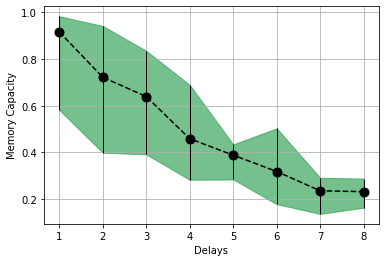

In [19]:
plot(x=delays, y=q2_list, error_bars=np.array([q1_list, q3_list]))
plt.ylabel("Memory Capacity")
plt.xlabel("Delays")

As you can see, a broader sample is needed to obtain smoother results. You can use for instance 100 seeds.

### Plot data in the repository

The data of Figure 3 can be found in the folder `data` of this repository. Notice that for fermions there are 8 folders, each folder corresponds to one value of delay between 1 and 8. Once you have downloaded the data, you will be able to reproduce Figure 3 with the previous two cells.